# ETS models¶
The ETS models are a family of time series models with an underlying state space model consisting of a level component, a trend component (T), a seasonal component (S), and an error term (E).

This notebook shows how they can be used with statsmodels. For a more thorough treatment we refer to [1], chapter 8 (free online resource), on which the implementation in statsmodels and the examples used in this notebook are based.

statsmodels implements all combinations of: - additive and multiplicative error model - additive and multiplicative trend, possibly dampened - additive and multiplicative seasonality

However, not all of these methods are stable. Refer to [1] and references therein for more info about model stability.

[1] Hyndman, Rob J., and George Athanasopoulos. Forecasting: principles and practice, 3rd edition, OTexts, 2019. https://www.otexts.org/fpp3/7

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
from statsmodels.tsa.exponential_smoothing.ets import ETSModel

In [2]:
plt.rcParams["figure.figsize"] = (12, 8)


## Simple exponential smoothing¶
The simplest of the ETS models is also known as simple exponential smoothing. In ETS terms, it corresponds to the (A, N, N) model, that is, a model with additive errors, no trend, and no seasonality. The state space formulation of Holt’s method is:

 \begin{align}
y_{t} &= y_{t-1} + e_t\\
l_{t} &= l_{t-1} + \alpha e_t\\
\end{align}

This state space formulation can be turned into a different formulation, a forecast and a smoothing equation (as can be done with all ETS models):

 \begin{align}
\hat{y}_{t|t-1} &= l_{t-1}\\
l_{t} &= \alpha y_{t-1} + (1 - \alpha) l_{t-1}
\end{align}

Here, \hat{y}_{t|t-1} is the forecast/expectation of y_t given the information of the previous step. In the simple exponential smoothing model, the forecast corresponds to the previous level. The second equation (smoothing equation) calculates the next level as weighted average of the previous level and the previous observation.

Text(0, 0.5, 'Annual oil production in Saudi Arabia (Mt)')

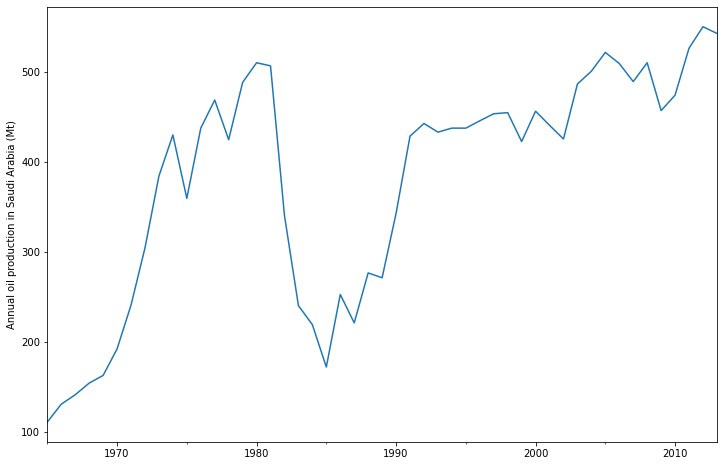

In [3]:
oildata = [
    111.0091,
    130.8284,
    141.2871,
    154.2278,
    162.7409,
    192.1665,
    240.7997,
    304.2174,
    384.0046,
    429.6622,
    359.3169,
    437.2519,
    468.4008,
    424.4353,
    487.9794,
    509.8284,
    506.3473,
    340.1842,
    240.2589,
    219.0328,
    172.0747,
    252.5901,
    221.0711,
    276.5188,
    271.1480,
    342.6186,
    428.3558,
    442.3946,
    432.7851,
    437.2497,
    437.2092,
    445.3641,
    453.1950,
    454.4096,
    422.3789,
    456.0371,
    440.3866,
    425.1944,
    486.2052,
    500.4291,
    521.2759,
    508.9476,
    488.8889,
    509.8706,
    456.7229,
    473.8166,
    525.9509,
    549.8338,
    542.3405,
]
oil = pd.Series(oildata, index=pd.date_range("1965", "2013", freq="AS"))
oil.plot()
plt.ylabel("Annual oil production in Saudi Arabia (Mt)")

The plot above shows annual oil production in Saudi Arabia in million tonnes. The data are taken from the R package fpp2 (companion package to prior version [1]). Below you can see how to fit a simple exponential smoothing model using statsmodels’s ETS implementation to this data. Additionally, the fit using forecast in R is shown as comparison.



**ATTENTION**
Parameter: maxiter

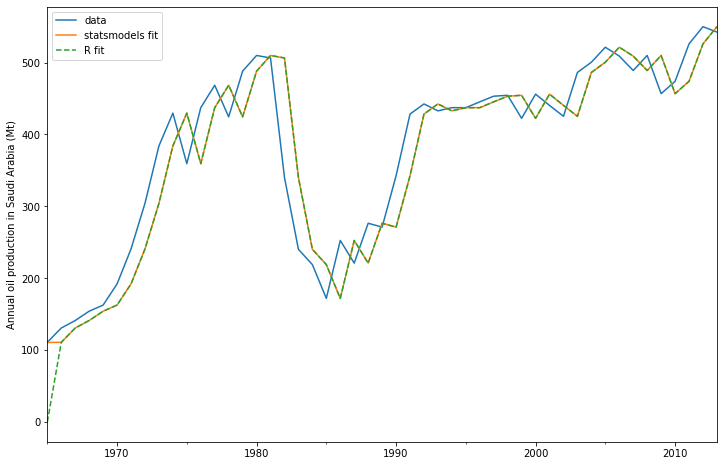

In [6]:
model = ETSModel(oil)
fit = model.fit(maxiter=10000)
oil.plot(label="data")
fit.fittedvalues.plot(label="statsmodels fit")
plt.ylabel("Annual oil production in Saudi Arabia (Mt)")

# obtained from R
params_R = [0.99989969, 0.11888177503085334, 0.80000197, 36.46466837, 34.72584983]
yhat = model.smooth(params_R).fittedvalues
yhat.plot(label="R fit", linestyle="--")

plt.legend()

In [10]:
model = ETSModel(oil)
print(model.__dict__)

{'data': <statsmodels.base.data.PandasData object at 0x00000142140FD5E0>, 'k_constant': 0, 'exog': None, 'endog': array([111.0091, 130.8284, 141.2871, 154.2278, 162.7409, 192.1665,
       240.7997, 304.2174, 384.0046, 429.6622, 359.3169, 437.2519,
       468.4008, 424.4353, 487.9794, 509.8284, 506.3473, 340.1842,
       240.2589, 219.0328, 172.0747, 252.5901, 221.0711, 276.5188,
       271.148 , 342.6186, 428.3558, 442.3946, 432.7851, 437.2497,
       437.2092, 445.3641, 453.195 , 454.4096, 422.3789, 456.0371,
       440.3866, 425.1944, 486.2052, 500.4291, 521.2759, 508.9476,
       488.8889, 509.8706, 456.7229, 473.8166, 525.9509, 549.8338,
       542.3405]), '_data_attr': ['exog', 'endog', 'data.exog', 'data.endog', 'data.orig_endog', 'data.orig_exog'], '_init_keys': [], '_index': DatetimeIndex(['1965-01-01', '1966-01-01', '1967-01-01', '1968-01-01',
               '1969-01-01', '1970-01-01', '1971-01-01', '1972-01-01',
               '1973-01-01', '1974-01-01', '1975-01-01', '1976-0

In [11]:
print(dir(model))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_check_kwargs', '_convert_and_bound_start_params', '_data_attr', '_default_start_params', '_fit_collinear', '_fit_zeros', '_fixed_params', '_fixed_params_index', '_formula_max_endog', '_free_params_index', '_get_exog_names', '_get_index_label_loc', '_get_index_loc', '_get_init_kwds', '_get_internal_states', '_get_prediction_index', '_get_states', '_handle_data', '_has_fixed_params', '_hessian_complex_step', '_hessian_finite_difference', '_index', '_index_dates', '_index_freq', '_index_generated', '_index_inferred_freq', '_index_int64', '_index_none', '_init_dates', '_init_keys', '_init_kwargs', '_internal_initial_state_names', '_internal_param_na